# Depression forecast for supporting students at university

## Problem Statement
Depression is a common health problem, ranking third after cardiac and respiratory diseases as a major cause of
disability. There is evidence to suggest that university students are at higher risk of depression, despite being a
socially advantaged population, but the reported rates have shown wide variability across settings. For instance, a
study in Germany has shown that 23 % of students had depressive symptoms during the lockdown, compared to
13 % before the pandemic. Thus, to analyze the depression level in university students might help supporting
individuals in preventing serious mental problems.

## Dataset
In this example, we use the "lifestyle and depression" dataset (available here: https://github.com/mehedimamun/Lifestyle-and-Depression-Among-University-Students/) 

**Students:** 754

**Features:** 34

The data fall under two categories:
- **Categorical features:**
    - mood: Tensed, Sad, Lost, Happy, Angry
    - gender: male or female
    - subject: major 
    - living: liveing with parents or not
    - employment: employed or not
    - personality: Extrovert, Ambivert, Introvert
    - relationship: in relationship or single
    - hobbies: 
    - smoker: smokes or not
    - alcoholic: alcoholic or not
    - drug_addicted: addict or not
    - hangout: how often they hangout with friends
    - social_events: how often they go to social events
    - pray: praying 
    - sports: Not at all, Sometimes, Regularly
    - exercise: Not at all, Sometimes, Regularly
    - meditation: Not at all, Sometimes, Regularly
    - video_games: Not at all, Sometimes, Very Often, Often
    - phone_hours: range of phone usage
    - medication: yes or no
    - category: Moderate, Severe
    
***
   

- **Numerical features:**

    - age: age of student
    - semester: amount of semesters studying
    - sibilings: number of siblings
    - wakeup: 
    - breakfast:
    - launch
    - dinner
    - sleep
    - friends: number of friends
    - study_hours: number of study hours per day
    - movies_per_week: number of movies per week
    - music hours: number of music hours 
    - depression: depression score
***

## Data Checking

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ingore warnings inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
# Show all columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Read the original dataset 
df = pd.read_csv('depression.csv')
print(df.shape)

(754, 34)


In [3]:
# Get overview of the data
print('Overview of the dataset:')
print('\nNumber of rows:', df.shape[0])
print('\nNumber of features:', df.shape[1])
print('\nData Features:')
print()
print(df.columns.tolist())
print("\nUnique values:")
print()
for cols in df.columns:
    if len(df[cols].unique()) <= 10:
        print(cols,':', len(df[cols].unique()), df[cols].unique())
    else:
        print(cols,':', len(df[cols].unique()))

Overview of the dataset:

Number of rows: 754

Number of features: 34

Data Features:

['mood', 'age', 'gender', 'subject', 'semester', 'sibilings', 'living', 'employment', 'personality', 'relationship', 'wakeup', 'breakfast', 'launch', 'dinner', 'sleep', 'hobbies', 'smoker', 'alcoholic', 'drug_addicted', 'friends', 'hangout', 'social_events', 'pray', 'sports', 'exercise', 'meditation', 'video_games', 'study_hours', 'phone_hours', 'medication', 'movies_per_week', 'music hours', 'depression', 'category']

Unique values:

mood : 5 ['Tensed' 'Sad' 'Lost' 'Happy' 'Angry']
age : 16
gender : 3 ['Female' 'Male' 'Others']
subject : 69
semester : 22
sibilings : 12
living : 2 ['With family' 'Without family']
employment : 3 ['Part time' 'None' 'Full time']
personality : 3 ['Extrovert' 'Ambivert' 'Introvert']
relationship : 5 ['In a relationship' 'Single' 'Engaged' 'Divorced' 'Married']
wakeup : 75
breakfast : 68
launch : 58
dinner : 27
sleep : 65
hobbies : 178
smoker : 2 ['No' 'Yes']
alcoholic : 

## Data Visualization

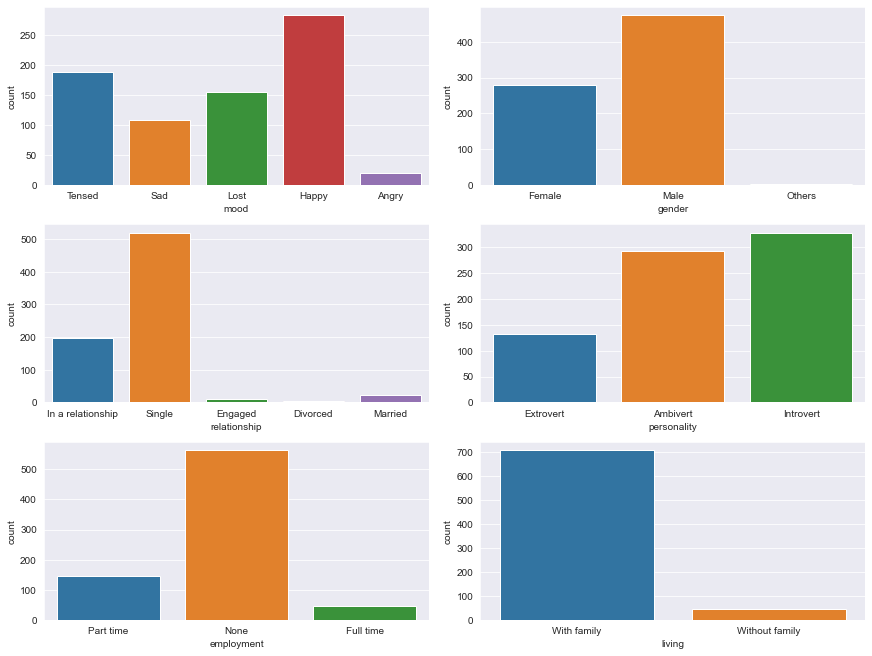

In [4]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(3,2,constrained_layout=True, figsize=(12, 9))
axesSub = sns.countplot(x="mood", data=df, ax=ax[0][0])
axesSub = sns.countplot(x="gender", data=df, ax=ax[0][1])
axesSub = sns.countplot(x="relationship", data=df, ax=ax[1][0])
axesSub = sns.countplot(x="personality", data=df, ax=ax[1][1])
axesSub = sns.countplot(x="employment", data=df, ax=ax[2][0])
axesSub = sns.countplot(x="living", data=df, ax=ax[2][1])

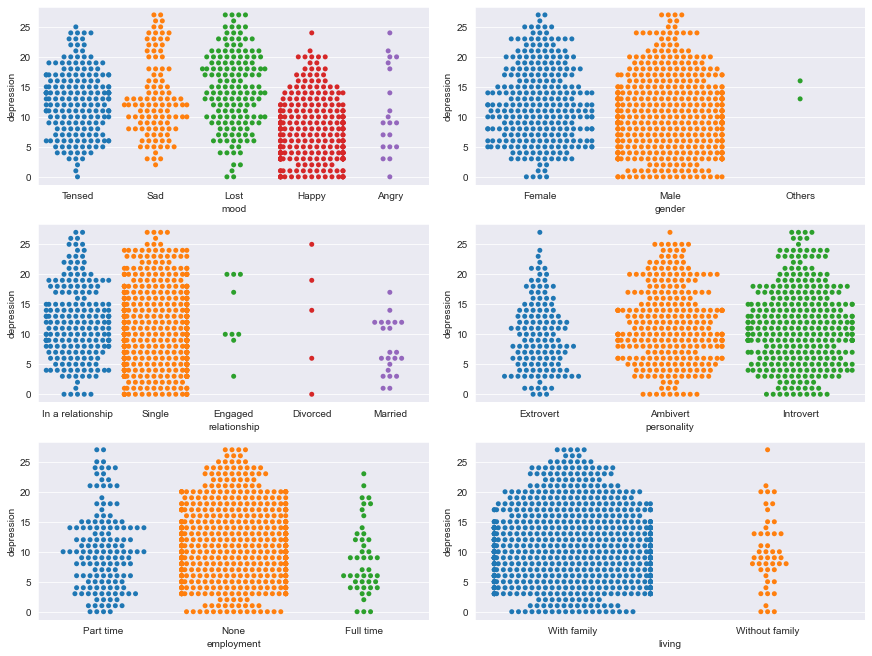

In [5]:
fig, ax = plt.subplots(3,2,constrained_layout=True, figsize=(12, 9))
axesSub = sns.swarmplot(x="mood", y="depression", data=df, ax=ax[0][0])
axesSub = sns.swarmplot(x="gender", y="depression", data=df, ax=ax[0][1])
axesSub = sns.swarmplot(x="relationship", y="depression", data=df, ax=ax[1][0])
axesSub = sns.swarmplot(x="personality", y="depression", data=df, ax=ax[1][1])
axesSub = sns.swarmplot(x="employment", y="depression", data=df, ax=ax[2][0])
axesSub = sns.swarmplot(x="living", y="depression", data=df, ax=ax[2][1])

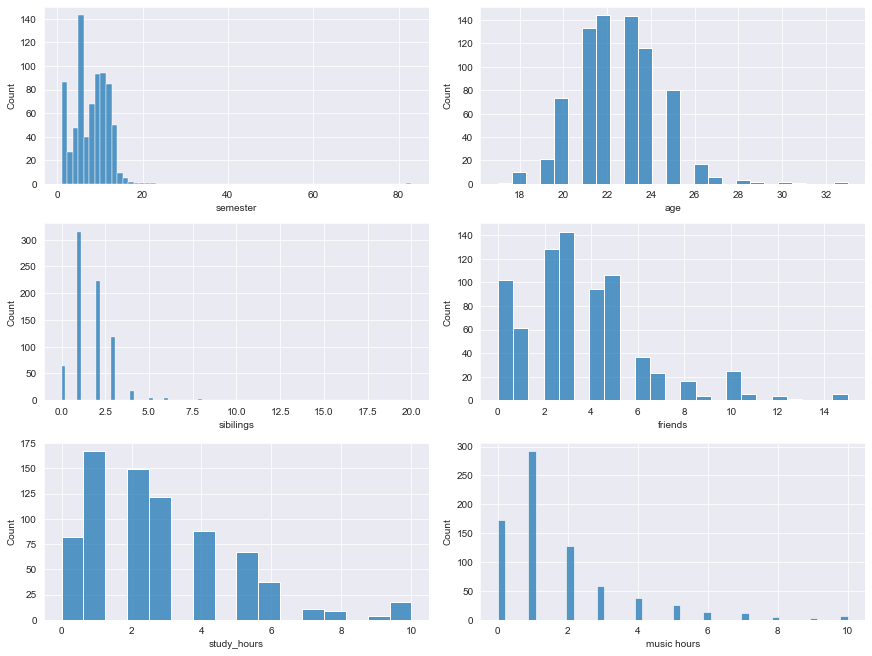

In [6]:
fig, ax = plt.subplots(3,2,constrained_layout=True, figsize=(12, 9))
axesSub = sns.histplot(x="semester", data=df, ax=ax[0][0])
axesSub = sns.histplot(x="age",data=df, ax=ax[0][1])
axesSub = sns.histplot(x="sibilings", data=df, ax=ax[1][0])
axesSub = sns.histplot(x="friends", data=df, ax=ax[1][1])
axesSub = sns.histplot(x="study_hours", data=df, ax=ax[2][0])
axesSub = sns.histplot(x="music hours",data=df, ax=ax[2][1])

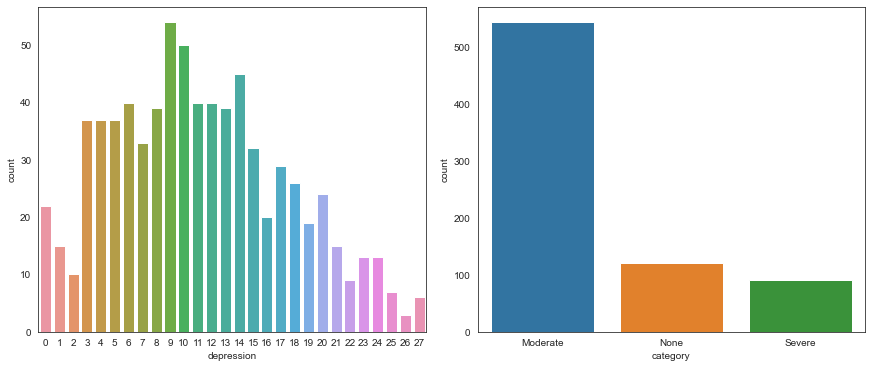

In [7]:
sns.set_style('white')
fig, ax = plt.subplots(1,2,constrained_layout=True, figsize=(12, 5))
axesSub = sns.countplot(x="depression", data=df, ax=ax[0])
axesSub = sns.countplot(x="category", data=df, ax=ax[1])

## Data Pre-Processing

### Data Cleaning

In [8]:
# Check and remove items with null values
df.isnull().sum()
df.dropna(inplace = True)

# For movies_per_week column, transfer nonumeric numbers to NaN then remove
df['movies_per_week'] = pd.to_numeric(df['movies_per_week'],'coerce')
df.dropna(inplace = True)

df = df.reset_index(drop=True)
print(df.shape)

(748, 34)


In [9]:
# Deal with Hobbies: Find 8 most common hobbies as one hot encoding, ignore others
hobbies = ['None', 'Music', 'Traveling', 'Photography', 'Programming', 'Gaming', 'Painting', 'Dancing']
hobbies_column = ['hobby_none', 'hobby_music', 'hobby_traveling', 'hobby_photography', 'hobby_programming',
                 'hobby_gaming', 'hobby_painting', 'hobby_dancing']
hobbies_oh = [[] for i in range(len(hobbies))]

for index, item in enumerate(df['hobbies']):
    for h in range(len(hobbies)):
        if hobbies[h] in item:
            hobbies_oh[h].append(1)
        else:
            hobbies_oh[h].append(0)

for index in range(len(hobbies_column)):    
    df[hobbies_column[index]] = hobbies_oh[index]
print(df.shape)
df.head()

(748, 42)


mood  age  gender      subject  semester  sibilings       living  \
0  Tensed   24  Female  Engineering         9          3  With family   
1  Tensed   23    Male  Engineering        11          3  With family   
2     Sad   19  Female     Pharmacy         3          0  With family   
3    Lost   23  Female  Engineering        13          1  With family   
4    Lost   22    Male  Engineering        11          1  With family   

  employment personality       relationship       wakeup    breakfast  \
0  Part time   Extrovert  In a relationship  11:20:00 AM   1:10:00 AM   
1       None    Ambivert             Single  12:00:00 PM  12:15:00 PM   
2       None    Ambivert             Single   8:30:00 AM  10:00:00 AM   
3       None   Introvert  In a relationship   2:00:00 PM   3:00:00 PM   
4       None    Ambivert             Single  11:00:00 AM  11:30:00 AM   

       launch       dinner       sleep             hobbies smoker alcoholic  \
0  4:20:00 PM   9:20:00 PM  4:20:00 AM               other     No        No   
1  4:30:00 PM  10:30:00 PM  4:00:00 AM           Traveling    Yes        No   
2  3:00:00 PM  10:00:00 PM  1:00:00 AM     Music, Painting     No        No   
3  7:00:00 PM  12:00:00 AM  3:00:00 AM  Music, Programming     No        No   
4  3:00:00 PM  11:30:00 PM  3:30:00 AM               Music    Yes        No   

  drug_addicted  friends     hangout social_events       pray      sports  \
0            No        2   Sometimes    Very Often  Regularly  Not at all   
1            No        4       Often     Sometimes  Regularly   Sometimes   
2            No        4   Sometimes     Sometimes  Regularly  Not at all   
3            No        1  Not at all    Not at all  Sometimes  Not at all   
4            No        5   Sometimes     Sometimes  Sometimes   Sometimes   

     exercise  meditation video_games  study_hours phone_hours medication  \
0  Not at all  Not at all  Not at all            2      6 to 8         No   
1   Regularly   Sometimes   Sometimes            4      0 to 2         No   
2   Sometimes  Not at all  Not at all            3      6 to 8         No   
3  Not at all  Not at all  Very Often            1      0 to 2         No   
4   Sometimes  Not at all  Very Often            2      6 to 8         No   

   movies_per_week  music hours  depression  category  hobby_none  \
0              0.0            0          18  Moderate           0   
1              5.0            0           1      None           0   
2              0.0            0          21    Severe           0   
3              5.0            0          23    Severe           0   
4              1.0            4          19  Moderate           0   

   hobby_music  hobby_traveling  hobby_photography  hobby_programming  \
0            0                0                  0                  0   
1            0                1                  0                  0   
2            1                0                  0                  0   
3            1                0                  0                  1   
4            1                0                  0                  0   

   hobby_gaming  hobby_painting  hobby_dancing  
0             0               0              0  
1             0               0              0  
2             0               1              0  
3             0               0              0  
4             0               0              0

In [10]:
# Combine wrongly written subjects and similar subjects
for index, item in enumerate(df['subject']):
    if "Environmental" in item:
        df['subject'][index] = "Environmental Management"
    if "Environment" in item:
        df['subject'][index] = "Environmental Management"
    if "Biochemistry" in item:
        df['subject'][index] = "Biochemistry and Biotechnology"
    if "Biotechnology" in item:
        df['subject'][index] = "Biochemistry and Biotechnology"
    if "Biotechnology" in item:
        df['subject'][index] = "Biochemistry and Biotechnology"
    if "BBA" in item:
        df['subject'][index] = "Business"
    if "Bba" in item:
        df['subject'][index] = "Business"
    if "Mathematics" in item:
        df['subject'][index] = "Mathematics"
    if "English Linguistics" in item:
        df['subject'][index] = "English Linguistics"
    if "English linguistics" in item:
        df['subject'][index] = "English Linguistics"
    if "Linguistics" in item:
        df['subject'][index] = "English Linguistics"
    if "Microbiology" in item:
        df['subject'][index] = "Microbiology"
    if "Physics" in item:
        df['subject'][index] = "Mathematics"
    if "IT" in item:
        df['subject'][index] = "Mathematics"
    if "Interior Architecture" in item:
        df['subject'][index] = "Architecture" 
    if "Economics" in item:
        df['subject'][index] = "Business"  
    if "Marketing" in item:
        df['subject'][index] = "Business"   
    if "Botany" in item:
        df['subject'][index] = "Botany"

# Remove subjects which are occuring less then 5 times
df = df.groupby('subject').filter(lambda x : len(x)>=5)
len(df["subject"].unique())

12

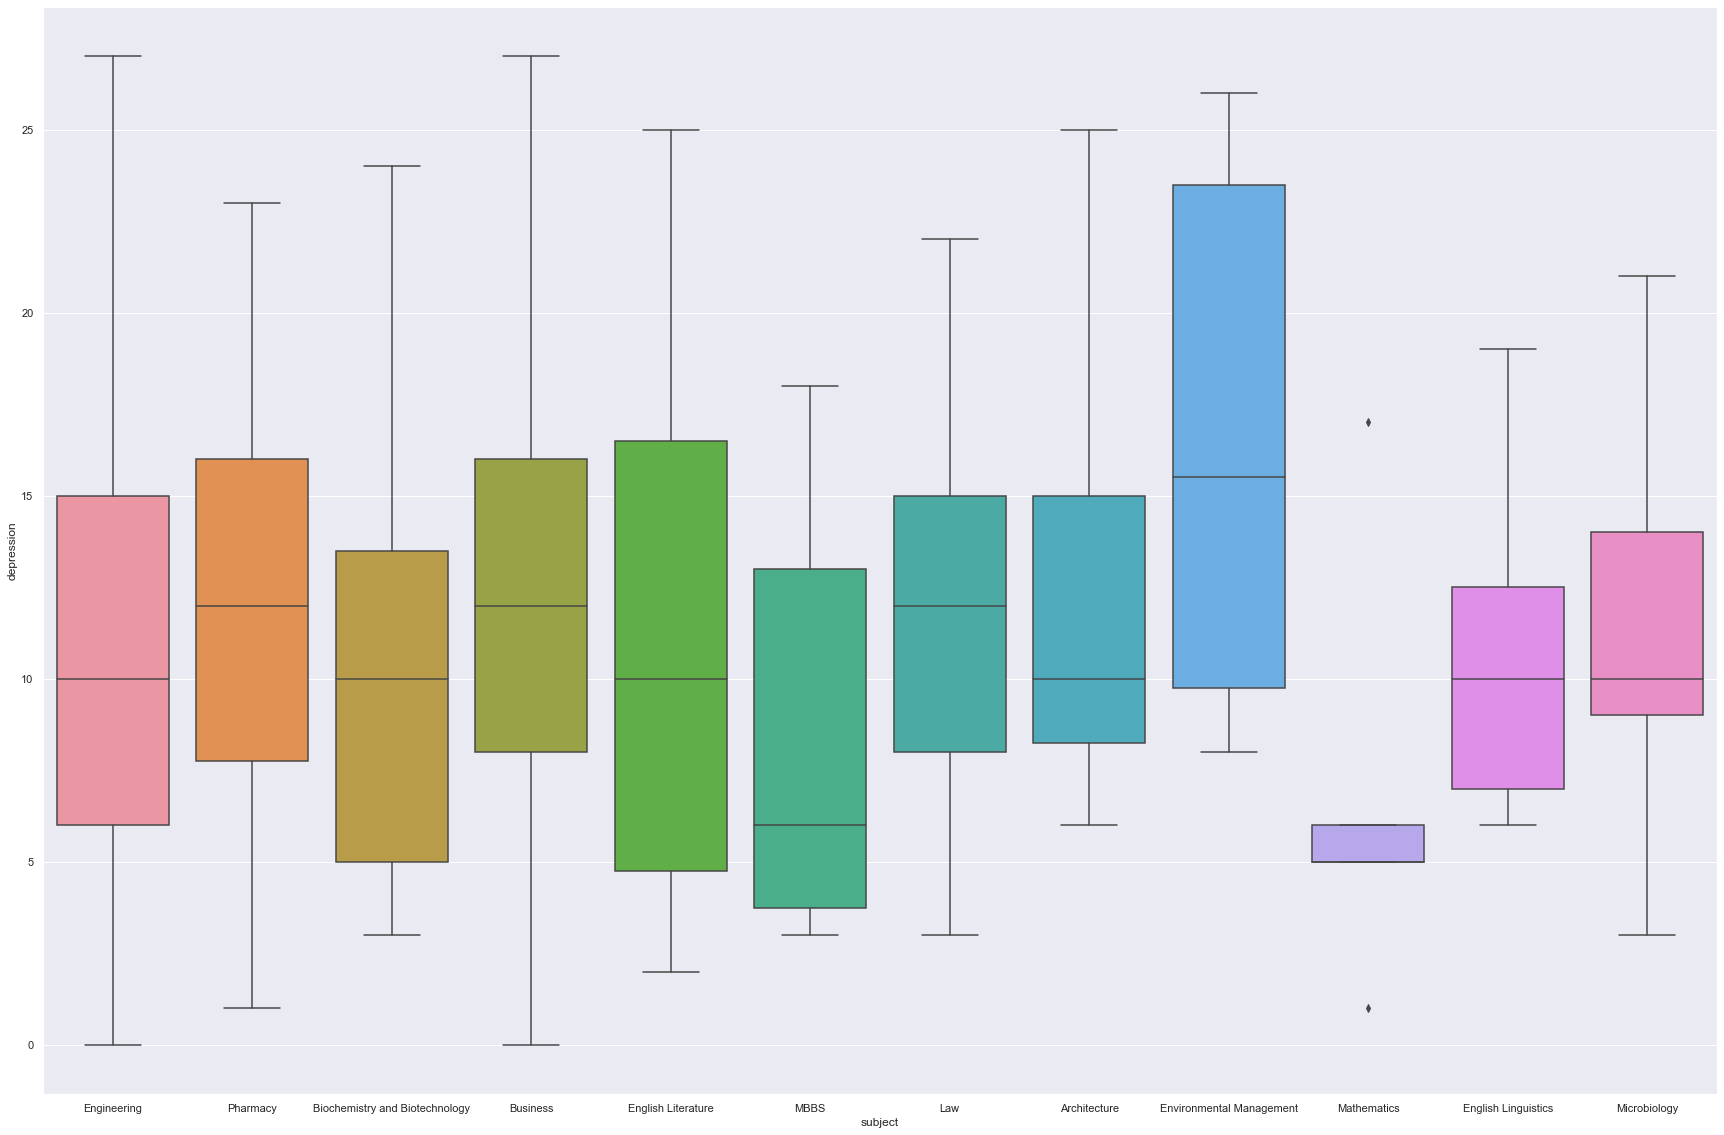

In [11]:
sns.set(rc={'figure.figsize':(30,20)})
ax = sns.boxplot(x="subject", y="depression", data=df)

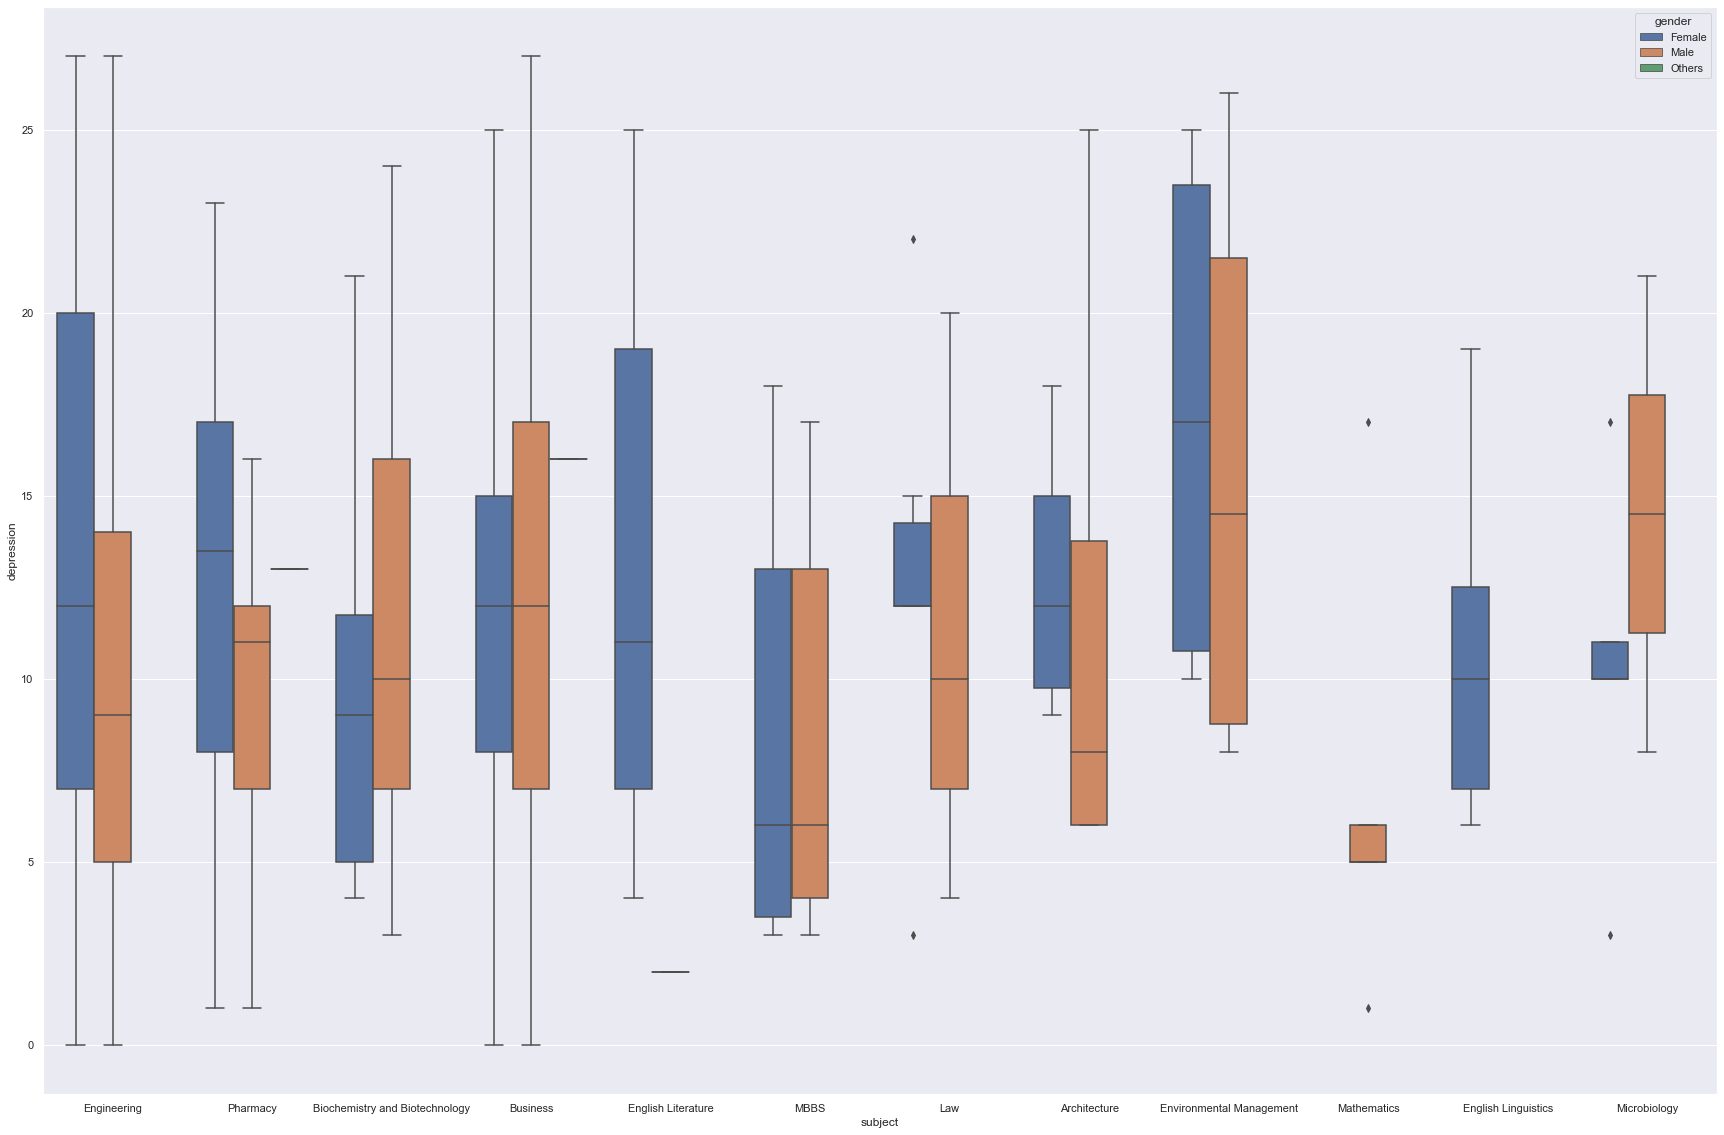

In [12]:
sns.set(rc={'figure.figsize':(30,20)})
ax = sns.boxplot(x="subject", y="depression",hue="gender", data=df)

<AxesSubplot:xlabel='sports', ylabel='depression'>

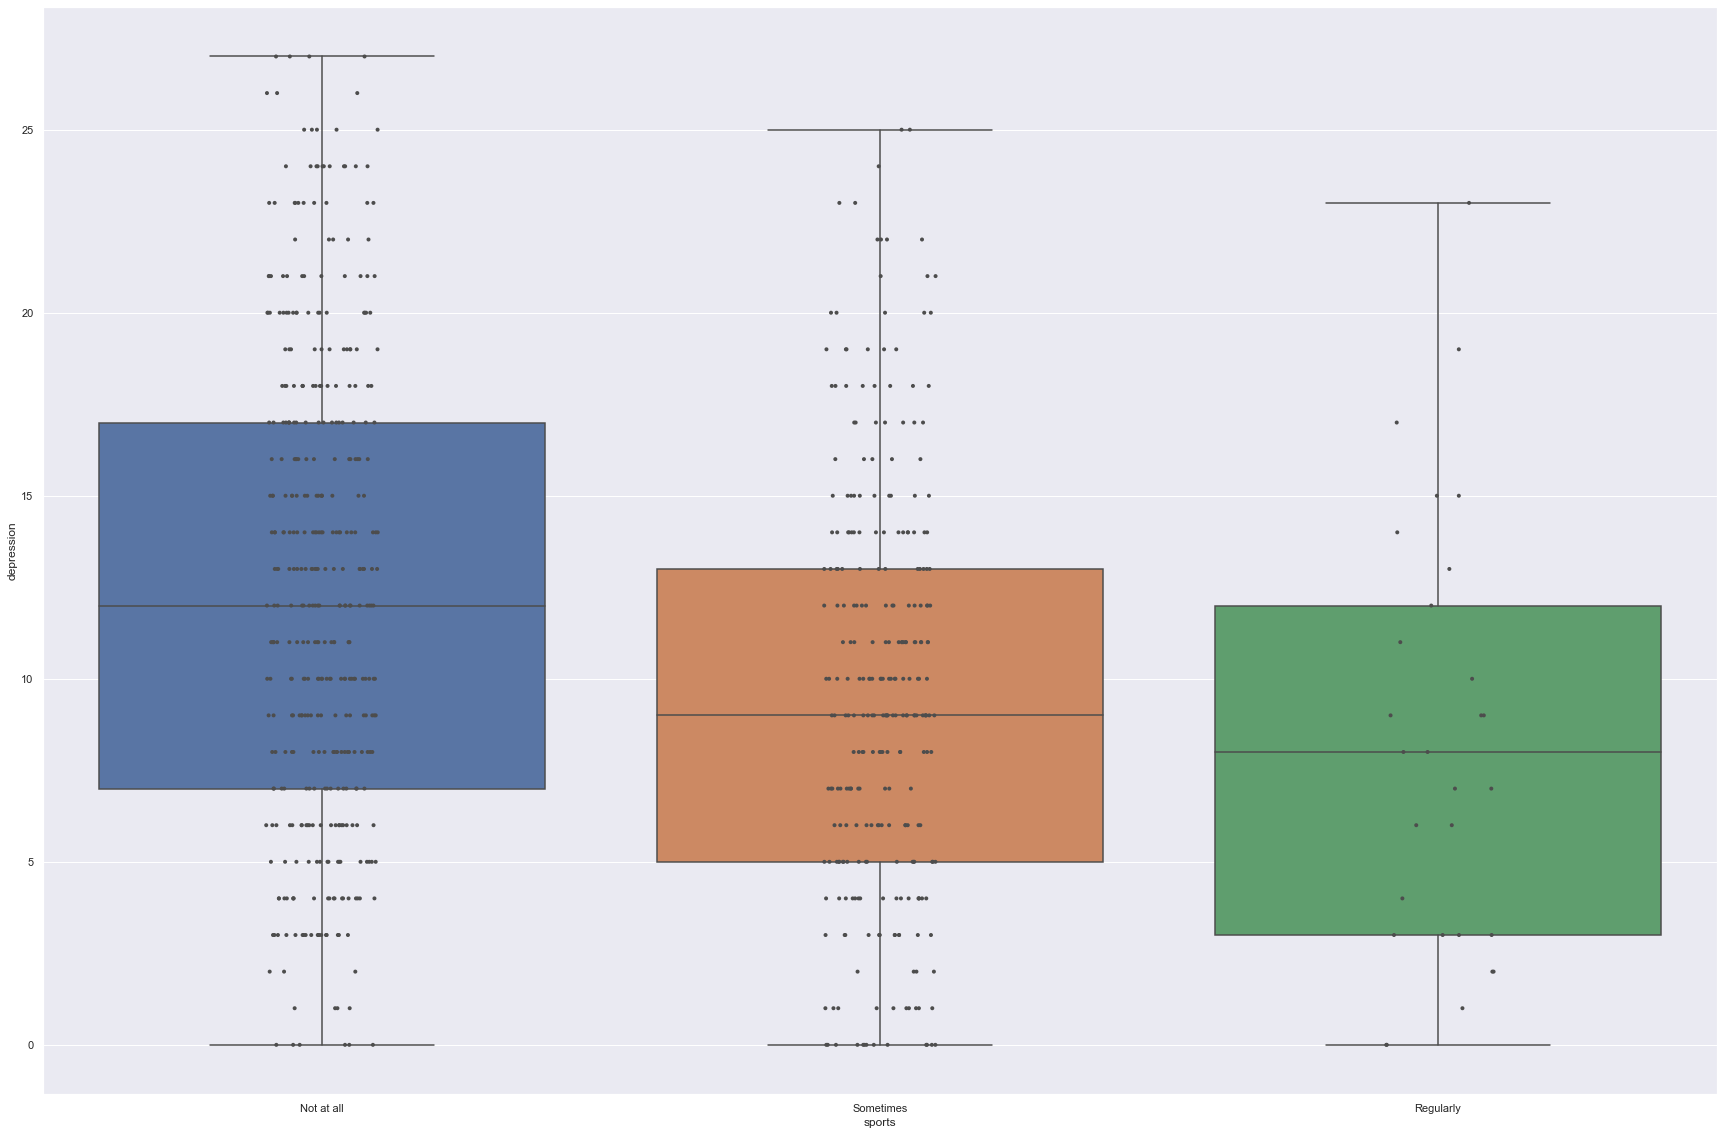

In [13]:
ax = sns.boxplot(x="sports", y="depression", data=df)
sns.stripplot(x="sports", y="depression", data=df,
              size=4, color=".3", linewidth=0)

This plot shows the relationship between sports and depression. Therefore you can see that even doing sports sometimes decreases your depression. This statement is also backed up by the Jewett et.al 2014

https://www.sciencedirect.com/science/article/pii/S1054139X14001967?casa_token=M7zHgxUAyB4AAAAA:aA2xHdVOTGsrceronbmyh5mff-1-l9SRsMiMXto1WuGZ0H_fh7ke8S10JuHi82ahPezlCnxN

<AxesSubplot:xlabel='mood', ylabel='depression'>

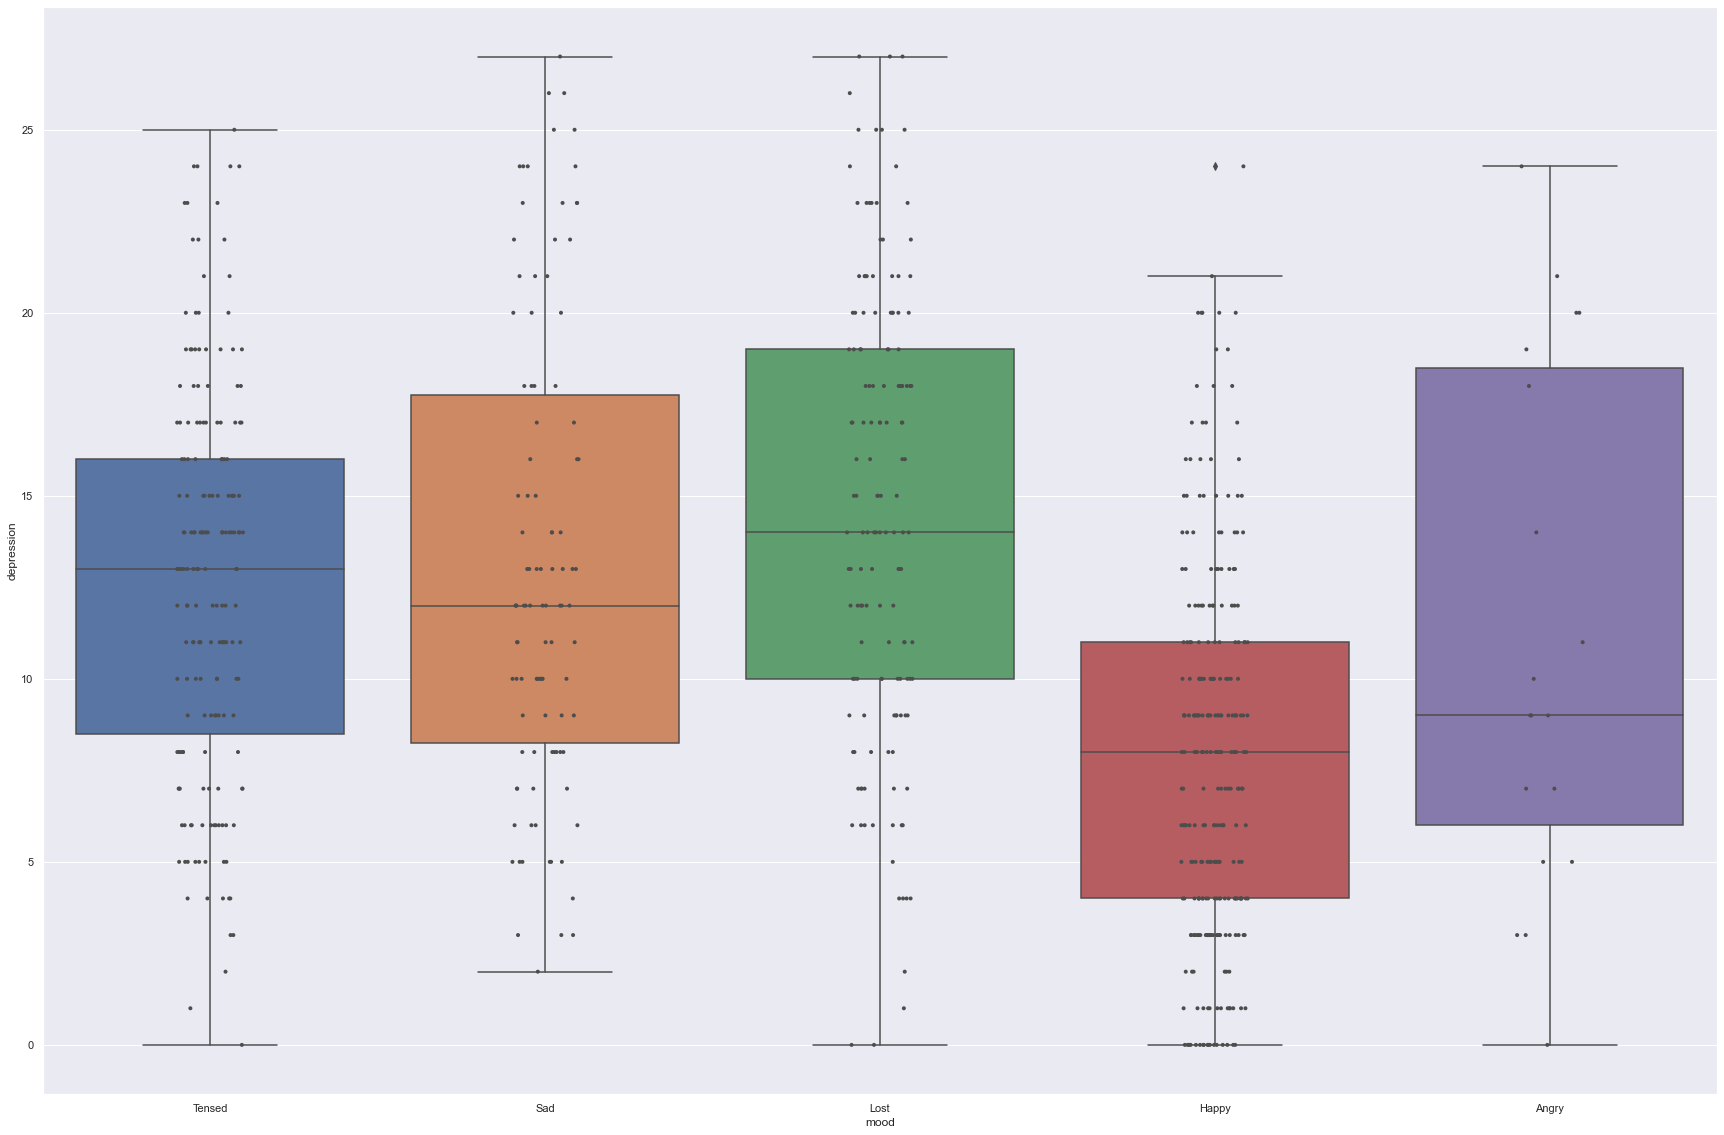

In [14]:
ax = sns.boxplot(x="mood", y="depression", data=df)
sns.stripplot(x="mood", y="depression", data=df,
              size=4, color=".3", linewidth=0)

<AxesSubplot:xlabel='personality', ylabel='depression'>

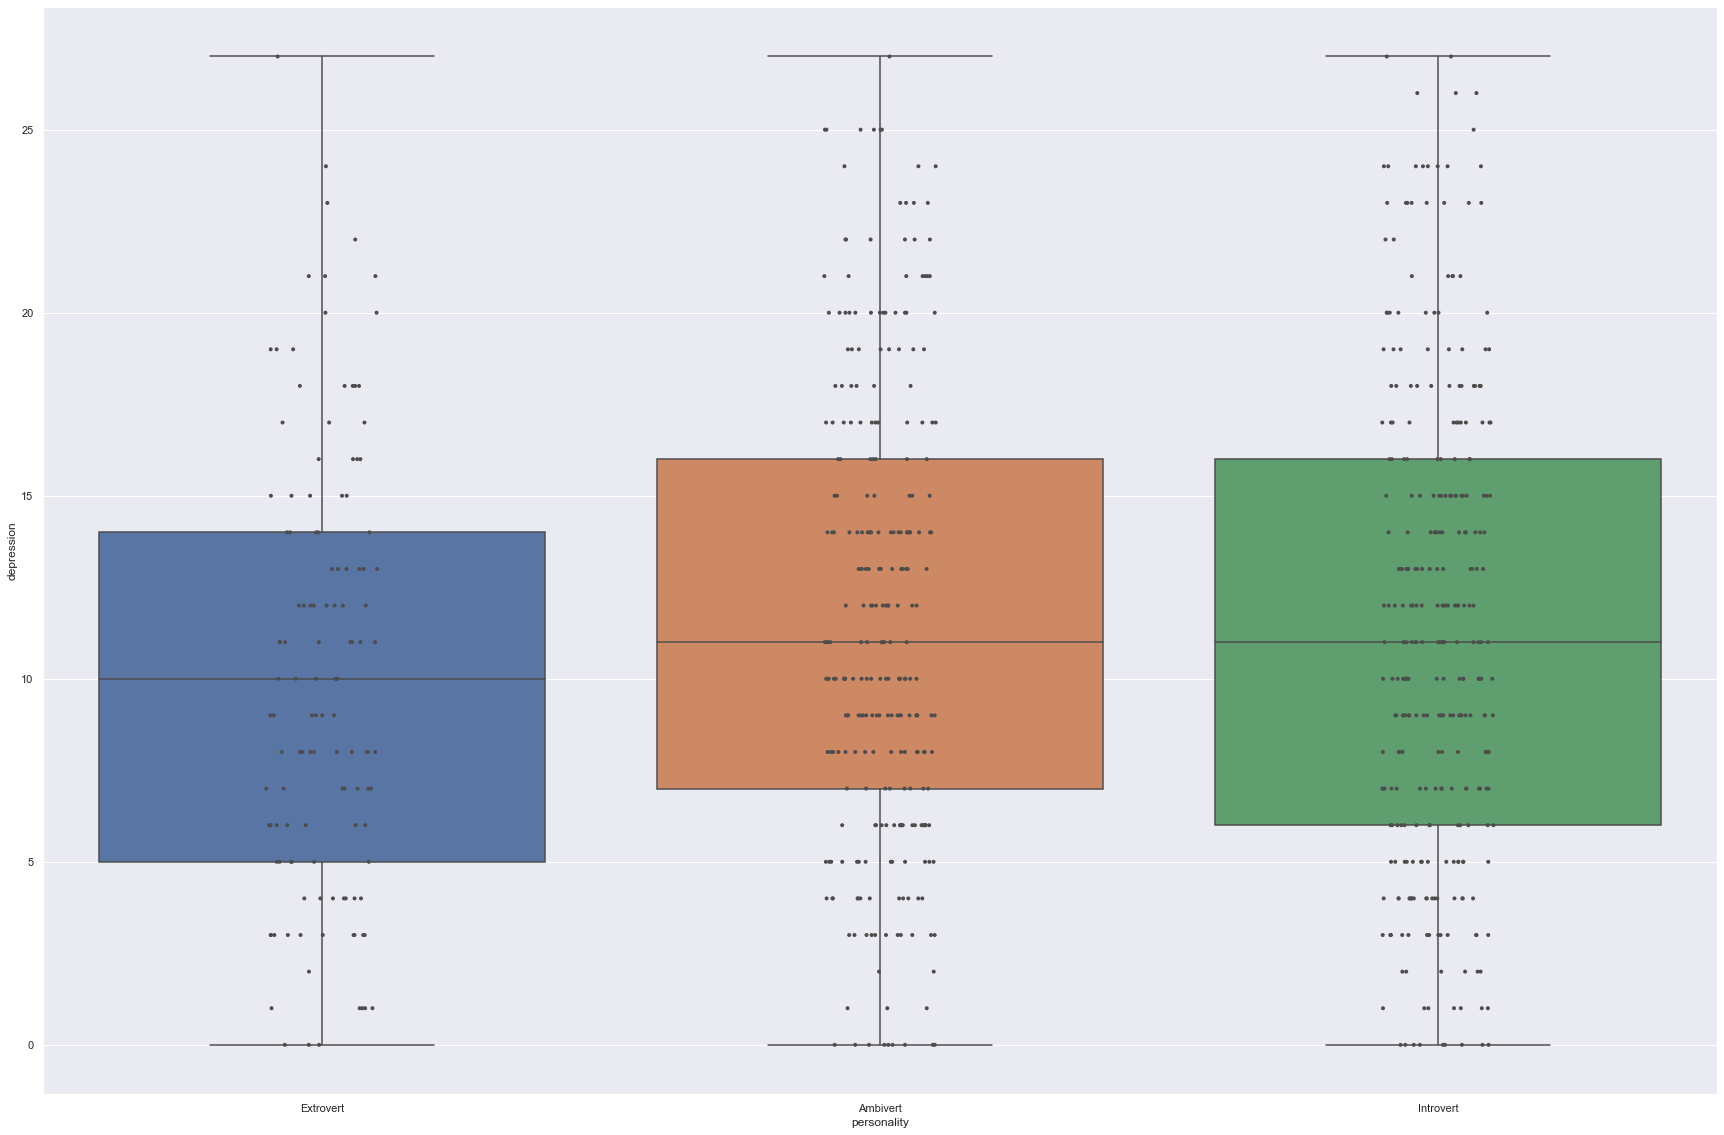

In [15]:
ax = sns.boxplot(x="personality", y="depression", data=df)
sns.stripplot(x="personality", y="depression", data=df,
              size=4, color=".3", linewidth=0)

<AxesSubplot:xlabel='drug_addicted', ylabel='depression'>

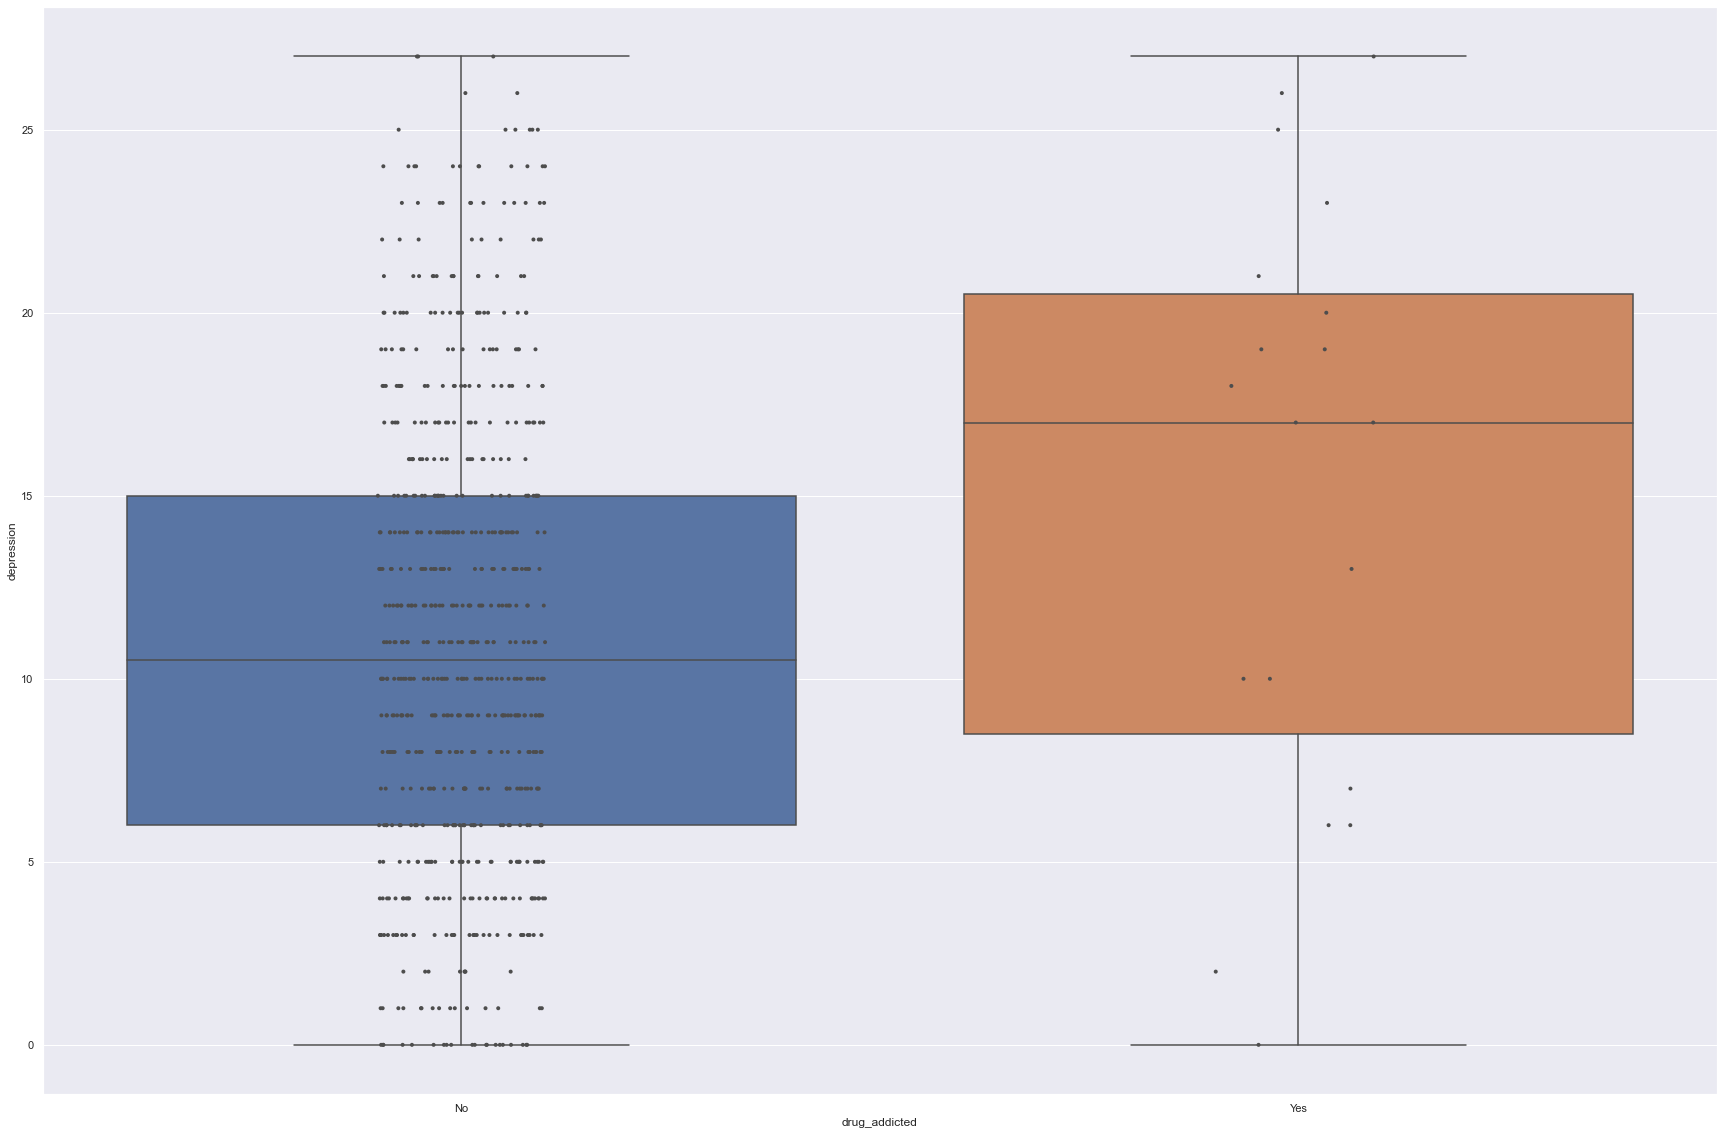

In [16]:
ax = sns.boxplot(x="drug_addicted", y="depression", data=df)
sns.stripplot(x="drug_addicted", y="depression", data=df,
              size=4, color=".3", linewidth=0)

In [17]:
# One hot encoding for subjects
df = pd.get_dummies(data=df, columns=['subject'])
print(df.shape)

(717, 53)


In [18]:
# Time columes, caculate sleep duration
df = df.reset_index(drop=True) # dfsleep = dfsleep.reset_index(drop=True)
dfsleep = df[['wakeup', 'sleep']].copy()
dfsleep.head()

wakeup       sleep
0  11:20:00 AM  4:20:00 AM
1  12:00:00 PM  4:00:00 AM
2   8:30:00 AM  1:00:00 AM
3   2:00:00 PM  3:00:00 AM
4  11:00:00 AM  3:30:00 AM

In [19]:
from dateutil import parser
sleepdurations = np.array([])
npwakes = dfsleep['wakeup'].to_numpy()
npsleeps = dfsleep['sleep'].to_numpy()
midnight = parser.parse("00:00:00")
evening = parser.parse("17:00:00")
noon = parser.parse("12:00:00")

for i in range(0, len(npwakes)):
    wake = parser.parse(npwakes[i])
    sleep = parser.parse(npsleeps[i])
    if noon <= sleep <= evening:
        # this is probably meant as AM not PM
        pmdist = sleep - noon # distance from midnight
        duration = wake - midnight + pmdist
    else:
        duration = wake - sleep
    sleepdurations = np.append(sleepdurations, duration.total_seconds()/3600)
    
dfsleep['sleep_duration'] = sleepdurations
dfsleep[dfsleep['sleep_duration'] <= 0].head()

wakeup        sleep  sleep_duration
46   8:00:00 AM  11:00:00 PM      -15.000000
69   6:10:00 AM  11:50:00 PM      -17.666667
84   6:00:00 AM  11:30:00 PM      -17.500000
108  5:30:00 AM  10:30:00 AM       -5.000000
126  6:30:00 AM  11:00:00 PM      -16.500000

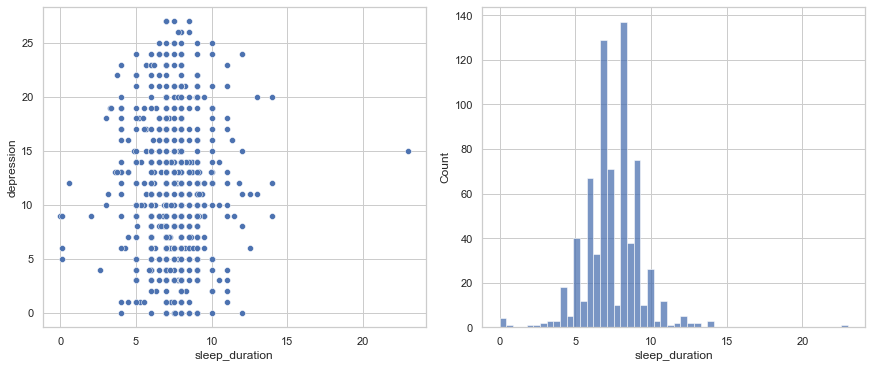

In [20]:
def adjustsleep(duration):
    if duration >= 0:
        return duration
    if 0 > duration > -12:
        return (12 + duration)
    if -12 >= duration > -24:
        return (24 + duration)

for i in range(0, len(dfsleep)):
    duration = dfsleep.iloc[i].sleep_duration
    dfsleep.at[i, 'sleep_duration'] = adjustsleep(dfsleep.iloc[i].sleep_duration)

df["sleep_duration"] = dfsleep["sleep_duration"]

# Plot to see
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,2,constrained_layout=True, figsize=(12, 5))
axesSub = sns.scatterplot(x="sleep_duration", y="depression", data=df, ax=ax[0])
axesSub = sns.histplot(x="sleep_duration", data=df, ax=ax[1])

### Feature Transformation 2: Categorical to Numeric, One Hot Encoding

In [21]:
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

In [22]:
df['smoker'] = df[['smoker']].apply(binary_map)
df['alcoholic'] = df[['alcoholic']].apply(binary_map)
df['drug_addicted'] = df[['drug_addicted']].apply(binary_map)
df['medication'] = df[['medication']].apply(binary_map)


df['gender'].replace({'Male':0, 'Female':1, 'Others':2}, inplace = True)
df['employment'].replace({'None':0, 'Part time':1, 'Full time':2}, inplace = True)
df['pray'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['sports'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['exercise'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['personality'].replace({'Introvert':0, 'Ambivert':1, 'Extrovert':2}, inplace = True)
df['meditation'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)

# Select categorical features where unique values <=6 & >=4 to one hot encoding
cat_features = []
for cols in df.columns:
    unique_vals = df[cols].unique()
    if df[cols].dtype != np.int64 and len(unique_vals) <= 6:
        cat_features.append(cols)

cat_features.remove('category')  # category is the target column for prediction
print(cat_features)

# Convert these features to one hot encoding
df = pd.get_dummies(data = df, columns = cat_features)
df.head()

['mood', 'living', 'relationship', 'hangout', 'social_events', 'video_games', 'phone_hours', 'subject_Architecture', 'subject_Biochemistry and Biotechnology', 'subject_Business', 'subject_Engineering', 'subject_English Linguistics', 'subject_English Literature', 'subject_Environmental Management', 'subject_Law', 'subject_MBBS', 'subject_Mathematics', 'subject_Microbiology', 'subject_Pharmacy']


age  gender  semester  sibilings  employment  personality       wakeup  \
0   24       1         9          3           1            2  11:20:00 AM   
1   23       0        11          3           0            1  12:00:00 PM   
2   19       1         3          0           0            1   8:30:00 AM   
3   23       1        13          1           0            0   2:00:00 PM   
4   22       0        11          1           0            1  11:00:00 AM   

     breakfast      launch       dinner       sleep             hobbies  \
0   1:10:00 AM  4:20:00 PM   9:20:00 PM  4:20:00 AM               other   
1  12:15:00 PM  4:30:00 PM  10:30:00 PM  4:00:00 AM           Traveling   
2  10:00:00 AM  3:00:00 PM  10:00:00 PM  1:00:00 AM     Music, Painting   
3   3:00:00 PM  7:00:00 PM  12:00:00 AM  3:00:00 AM  Music, Programming   
4  11:30:00 AM  3:00:00 PM  11:30:00 PM  3:30:00 AM               Music   

   smoker  alcoholic  drug_addicted  friends  pray  sports  exercise  \
0       0          0              0        2     2       0         0   
1       1          0              0        4     2       1         2   
2       0          0              0        4     2       0         1   
3       0          0              0        1     1       0         0   
4       1          0              0        5     1       1         1   

   meditation  study_hours  medication  movies_per_week  music hours  \
0           0            2           0              0.0            0   
1           1            4           0              5.0            0   
2           0            3           0              0.0            0   
3           0            1           0              5.0            0   
4           0            2           0              1.0            4   

   depression  category  hobby_none  hobby_music  hobby_traveling  \
0          18  Moderate           0            0                0   
1           1      None           0            0                1   
2          21    Severe           0            1                0   
3          23    Severe           0            1                0   
4          19  Moderate           0            1                0   

   hobby_photography  hobby_programming  hobby_gaming  hobby_painting  \
0                  0                  0             0               0   
1                  0                  0             0               0   
2                  0                  0             0               1   
3                  0                  1             0               0   
4                  0                  0             0               0   

   hobby_dancing  sleep_duration  mood_Angry  mood_Happy  mood_Lost  mood_Sad  \
0              0             7.0           0           0          0         0   
1              0             8.0           0           0          0         0   
2              0             7.5           0           0          0         1   
3              0            11.0           0           0          1         0   
4              0             7.5           0           0          1         0   

   mood_Tensed  living_With family  living_Without family  \
0            1                   1                      0   
1            1                   1                      0   
2            0                   1                      0   
3            0                   1                      0   
4            0                   1                      0   

   relationship_Divorced  relationship_Engaged  \
0                      0                     0   
1                      0                     0   
2                      0                     0   
3                      0                     0   
4                      0                     0   

   relationship_In a relationship  relationship_Married  relationship_Single  \
0                               1                     0                    0   
1                               0                     

### Outlier Detection

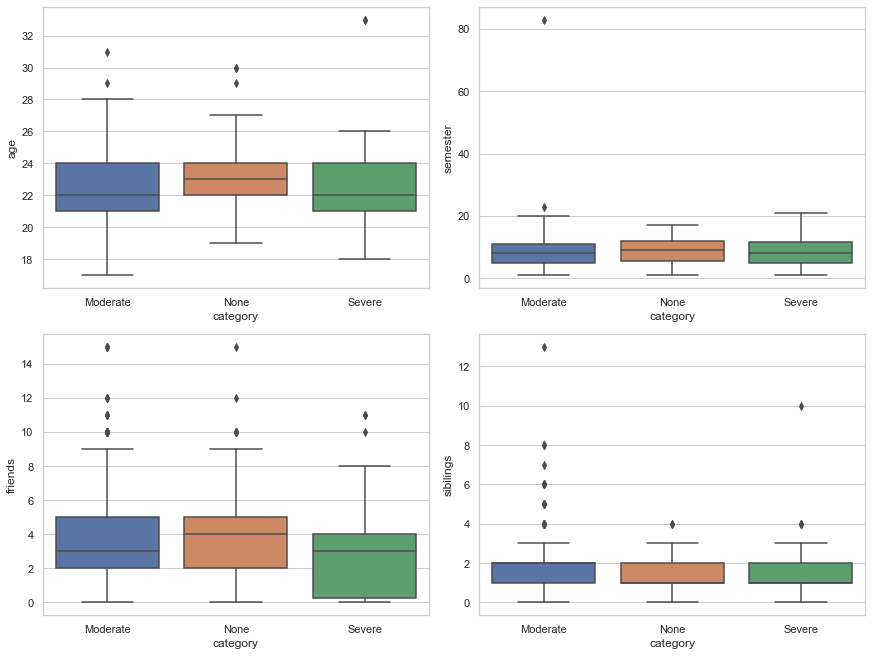

In [23]:
# Check for outliers and remove
fig, ax = plt.subplots(2,2,constrained_layout=True, figsize=(12, 9))
axesSub = sns.boxplot(x="category", y="age", data=df, ax=ax[0][0])
axesSub = sns.boxplot(x="category", y="semester", data=df, ax=ax[0][1])
axesSub = sns.boxplot(x="category", y="friends", data=df, ax=ax[1][0])
axesSub = sns.boxplot(x="category", y="sibilings", data=df, ax=ax[1][1])

In [24]:
# Set limits for features based on images above
dtlimit = {
    'age': 28,
    'semester': 20,
    'friends': 9,
    'sibilings': 4,
}

# Drop rows where limit exceed for features
for feature in dtlimit:
    index = df.index[df[feature] > dtlimit[feature]].tolist()
    df.drop(index = index, inplace = True)
    
print(df.shape)

(660, 87)


## Feature Selection

### Remove Improper Features

In [25]:
# Drop 'breakfast' 'launch' 'dinner' which make no sence, and two target columns
# Drop 'wakeup', 'sleep', 'hobbies' which has been replaced by new columns
X = df.drop(columns = ['breakfast', 'launch', 'dinner', 'depression', 'category', 'wakeup', 'sleep', 'hobbies'])
print(X.shape)
X.head()

(660, 79)


age  gender  semester  sibilings  employment  personality  smoker  \
0   24       1         9          3           1            2       0   
1   23       0        11          3           0            1       1   
2   19       1         3          0           0            1       0   
3   23       1        13          1           0            0       0   
4   22       0        11          1           0            1       1   

   alcoholic  drug_addicted  friends  pray  sports  exercise  meditation  \
0          0              0        2     2       0         0           0   
1          0              0        4     2       1         2           1   
2          0              0        4     2       0         1           0   
3          0              0        1     1       0         0           0   
4          0              0        5     1       1         1           0   

   study_hours  medication  movies_per_week  music hours  hobby_none  \
0            2           0              0.0            0           0   
1            4           0              5.0            0           0   
2            3           0              0.0            0           0   
3            1           0              5.0            0           0   
4            2           0              1.0            4           0   

   hobby_music  hobby_traveling  hobby_photography  hobby_programming  \
0            0                0                  0                  0   
1            0                1                  0                  0   
2            1                0                  0                  0   
3            1                0                  0                  1   
4            1                0                  0                  0   

   hobby_gaming  hobby_painting  hobby_dancing  sleep_duration  mood_Angry  \
0             0               0              0             7.0           0   
1             0               0              0             8.0           0   
2             0               1              0             7.5           0   
3             0               0              0            11.0           0   
4             0               0              0             7.5           0   

   mood_Happy  mood_Lost  mood_Sad  mood_Tensed  living_With family  \
0           0          0         0            1                   1   
1           0          0         0            1                   1   
2           0          0         1            0                   1   
3           0          1         0            0                   1   
4           0          1         0            0                   1   

   living_Without family  relationship_Divorced  relationship_Engaged  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      0                      0                     0   
4                      0                      0                     0   

   relationship_In a relationship  relationship_Married  relationship_Single  \
0                               1                     0                    0   
1                               0                     0                    1   
2                               0                     0                    1   
3                               1                     0                    0   
4                               0                     0                    1   

   hangout_Not at all  hangout_Often  hangout_Sometimes  hangout_Very Often  \
0                   0              0                  1                   0   
1                   0              1                  0                   0   
2                   0              0                  1                   0   
3                   1              0                  0                   0   
4                   0         

### Remove Correlated Features

In [26]:
# Check the correlation between features
import plotly.express as px
corr = X.corr()
fig = px.imshow(corr, width=1000, height=1000)
fig.show()

In [27]:
# Select highly correlated features and remove the first one
corr_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if(abs(corr.iloc[i, j])) > 0.8:
            colname = corr.columns[i]
            corr_features.add(colname)
print(corr_features)

X = X.drop(columns = corr_features)
print(X.shape)

{'subject_Engineering_1', 'subject_Biochemistry and Biotechnology_1', 'subject_English Linguistics_1', 'living_Without family', 'subject_Pharmacy_1', 'subject_MBBS_1', 'subject_Environmental Management_1', 'subject_Microbiology_1', 'relationship_Single', 'subject_English Literature_1', 'subject_Business_1', 'subject_Architecture_1', 'subject_Law_1', 'subject_Mathematics_1'}
(660, 65)


In [28]:
corr_features

{'living_Without family',
 'relationship_Single',
 'subject_Architecture_1',
 'subject_Biochemistry and Biotechnology_1',
 'subject_Business_1',
 'subject_Engineering_1',
 'subject_English Linguistics_1',
 'subject_English Literature_1',
 'subject_Environmental Management_1',
 'subject_Law_1',
 'subject_MBBS_1',
 'subject_Mathematics_1',
 'subject_Microbiology_1',
 'subject_Pharmacy_1'}

## Data Normalization and Split for Training and Testing

In [29]:
# Use min_max scaler to scale features to 0-1
from sklearn.preprocessing import MinMaxScaler

scale_vars = []
for cols in X.columns:
    if X[cols].max() > 1:
        if X[cols].dtype == np.int64 or X[cols].dtype == np.float64:
            scale_vars.append(cols)
print(scale_vars)

scaler = MinMaxScaler()
scaler.fit(X[scale_vars])
X[scale_vars] = scaler.transform(X[scale_vars])

['age', 'gender', 'semester', 'sibilings', 'employment', 'personality', 'friends', 'pray', 'sports', 'exercise', 'meditation', 'study_hours', 'movies_per_week', 'music hours', 'sleep_duration']


In [30]:
from sklearn.model_selection import train_test_split

y_category = df['category']  # for predicting category
y_depression = df['depression']  # for predicting depression score
X_train, X_test, y_category_train, y_category_test, y_depression_train, y_depression_test, = train_test_split(X, y_category, y_depression, test_size = 0.2, random_state = 20)
print(X_train.shape)
print(X_test.shape)

# Change None to No and Moderate+Severe to Yes, for Binary Prediction
# y_category_train.replace({'None':'No', 'Moderate':'Yes', "Severe":'Yes'}, inplace = True)
# y_category_test.replace({'None':'No', 'Moderate':'Yes', "Severe":'Yes'}, inplace = True)

(528, 65)
(132, 65)


## Balancing Dataset

In [31]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_category_train_smote = smote.fit_resample(X_train, y_category_train)
X_test_smote, y_category_test_smote = smote.fit_resample(X_test, y_category_test)

print('Original Dataset Shape:', y_category_train.shape)
print('Smote Resample Dataset Shape', y_category_train_smote.shape)
print()
print(y_category_train_smote.value_counts())

Original Dataset Shape: (528,)
Smote Resample Dataset Shape (1143,)

Severe      381
None        381
Moderate    381
Name: category, dtype: int64


## Model Creation and Evaluation (Classfication)

### Modeling and Training: Random Forest

In [32]:
from sklearn.model_selection import GridSearchCV # For hyper-parameters search
from sklearn.metrics import accuracy_score, classification_report

# Feature Importance Function
def feature_importance(alg, alg_name, threshold, X_train, X_test, y_train):
    sns.set(rc={'figure.figsize':(10,7)})
    model = alg()
    model.fit(X_train, y_train)
    importance = model.feature_importances_
    # plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()
    final_df = pd.DataFrame({
    "Features": X_train.columns,
    "Importances": importance
    })

    final_features = []
    for index, row in final_df.iterrows():
        if row['Importances'] >= threshold:
            final_features.append(row['Features'])

    X_train = X_train[final_features]
    X_test = X_test[final_features]
    print(X_train.shape)
    print('Final Features:')
    print(X_train.keys())
    return X_train, X_test

In [33]:
# Modelling Function
def modeling(alg, alg_name, param_grid, X_train, X_test, y_train, y_test):
   
    
    scores = ["precision", "recall"]
    for score in scores:
        print("Algorithm:", alg_name)
        print()
        print("Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(alg(), param_grid, scoring="%s_macro" % score)
        clf.fit(X_train, y_train)

        print("Best parameters set found:")
        print()
        print(clf.best_params_)
        print()
#         print("Grid scores on development set:")
#         print()
#         means = clf.cv_results_["mean_test_score"]
#         stds = clf.cv_results_["std_test_score"]
#         params = clf.cv_results_["params"]
#         for mean, std, param in zip(means, stds, params):
#             print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, param))
#         print()
        print("Classification report:")
        print()
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))
        
        y_pred_train = clf.predict(X_train)
        train_acc_score = accuracy_score(y_train, y_pred_train)
        print("Train Accuracy: ", "%0.2f" % train_acc_score)
        print()

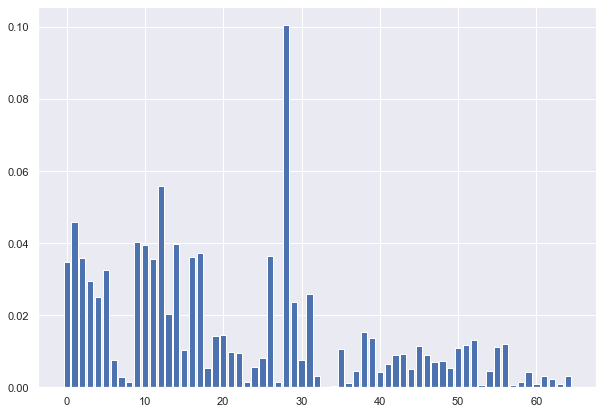

(1143, 18)
Final Features:
Index(['age', 'gender', 'semester', 'sibilings', 'employment', 'personality',
       'friends', 'pray', 'sports', 'exercise', 'meditation', 'study_hours',
       'movies_per_week', 'music hours', 'sleep_duration', 'mood_Happy',
       'mood_Lost', 'mood_Tensed'],
      dtype='object')


In [34]:
# Feature Importance for Random Forest
from sklearn.ensemble import RandomForestClassifier
X_train_smote_fi, X_test_smote_fi = feature_importance(RandomForestClassifier, 'Random Forest', 0.02, 
                                                       X_train_smote, X_test_smote, y_category_train_smote)

In [35]:
param_grid = [
  {'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20]},
] # Set hyper-parameters search space

modeling(RandomForestClassifier, 'Random Forest', param_grid, 
         X_train_smote_fi, X_test_smote_fi, y_category_train_smote, y_category_test_smote)

Algorithm: Random Forest

Tuning hyper-parameters for precision

Best parameters set found:

{'max_depth': 20}

Classification report:

              precision    recall  f1-score   support

    Moderate       0.68      0.94      0.79        95
        None       0.85      0.73      0.78        95
      Severe       0.91      0.71      0.79        95

    accuracy                           0.79       285
   macro avg       0.81      0.79      0.79       285
weighted avg       0.81      0.79      0.79       285

Train Accuracy:  1.00

Algorithm: Random Forest

Tuning hyper-parameters for recall

Best parameters set found:

{'max_depth': 20}

Classification report:

              precision    recall  f1-score   support

    Moderate       0.68      0.91      0.77        95
        None       0.89      0.67      0.77        95
      Severe       0.87      0.79      0.83        95

    accuracy                           0.79       285
   macro avg       0.81      0.79      0.79       285
w

### Modeling and Training: KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = [
  {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,15,20], 'metric':['minkowski'], 'p':[2]},
]
modeling(KNeighborsClassifier, 'KNN', param_grid, 
         X_train_smote, X_test_smote, y_category_train_smote, y_category_test_smote)

Algorithm: KNN

Tuning hyper-parameters for precision

Best parameters set found:

{'metric': 'minkowski', 'n_neighbors': 2, 'p': 2}

Classification report:

              precision    recall  f1-score   support

    Moderate       0.64      0.64      0.64        95
        None       0.54      0.67      0.60        95
      Severe       0.68      0.51      0.58        95

    accuracy                           0.61       285
   macro avg       0.62      0.61      0.61       285
weighted avg       0.62      0.61      0.61       285

Train Accuracy:  0.99

Algorithm: KNN

Tuning hyper-parameters for recall

Best parameters set found:

{'metric': 'minkowski', 'n_neighbors': 2, 'p': 2}

Classification report:

              precision    recall  f1-score   support

    Moderate       0.64      0.64      0.64        95
        None       0.54      0.67      0.60        95
      Severe       0.68      0.51      0.58        95

    accuracy                           0.61       285
   macro av

### Modeling and Training: SVM

In [37]:
from sklearn.svm import SVC
param_grid = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]}
]
modeling(SVC, 'SVM', param_grid, X_train_smote, X_test_smote, y_category_train_smote, y_category_test_smote)

Algorithm: SVM

Tuning hyper-parameters for precision

Best parameters set found:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Classification report:

              precision    recall  f1-score   support

    Moderate       0.73      0.89      0.81        95
        None       0.89      0.76      0.82        95
      Severe       0.92      0.85      0.89        95

    accuracy                           0.84       285
   macro avg       0.85      0.84      0.84       285
weighted avg       0.85      0.84      0.84       285

Train Accuracy:  0.89

Algorithm: SVM

Tuning hyper-parameters for recall

Best parameters set found:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Classification report:

              precision    recall  f1-score   support

    Moderate       0.73      0.89      0.81        95
        None       0.89      0.76      0.82        95
      Severe       0.92      0.85      0.89        95

    accuracy                           0.84       285
   macro avg       0.

## Model Creation and Evaluation (Regression)

To understand the dataset better and the correlation between the data and the depression score we are using OLS Regression to get R-squared

In [38]:
# original dataset
import statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_depression_train, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:             depression   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     5.050
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           4.52e-24
Time:                        13:27:20   Log-Likelihood:                -1593.4
No. Observations:                 528   AIC:                             3305.
Df Residuals:                     469   BIC:                             3557.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### Balancing Dataset

In [39]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [40]:
# Split data in to dataset for sampling and testing to keep the correct distripution in test set
B = df.drop(columns = ['breakfast', 'launch', 'dinner', 'wakeup', 'sleep', 'hobbies'])
sampling, test= train_test_split(B, test_size=0.2, random_state=42)
print(sampling.shape)
test_Y = test["depression"]
test_X = test.drop(["depression","category"],axis = 1)
samp_y = sampling["category"].copy()
sampling.drop(["category"],axis=1,inplace = True)

(528, 81)


In [41]:
# Oversampler to generate balanced dataset for better prediction
smote = SMOTE(random_state=42)
over = RandomOverSampler(random_state=42)
under = RandomUnderSampler(random_state=42,replacement=True)# fit predictor and target variable
x_over, y_over = over.fit_resample(sampling, samp_y)
x_under, y_under = under.fit_resample(sampling, samp_y)
x_smote, y_smote = smote.fit_resample(sampling, samp_y)

print('original dataset shape:', samp_y.shape)
print('Under Resample dataset shape', y_under.shape)
print('Over Resample dataset shape', y_over.shape)
print('Smote Resample dataset shape', y_smote.shape)

original dataset shape: (528,)
Under Resample dataset shape (201,)
Over Resample dataset shape (1134,)
Smote Resample dataset shape (1134,)


In [42]:
# Balancing dataset by oversampling
y_train_over = x_over["depression"]
X_train_over = x_over.drop(["depression"],axis= 1)

X = sm.add_constant(X_train_over)
model = sm.OLS(y_train_over, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:             depression   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     29.75
Date:                Fri, 15 Jul 2022   Prob (F-statistic):          1.42e-184
Time:                        13:27:20   Log-Likelihood:                -3506.2
No. Observations:                1134   AIC:                             7132.
Df Residuals:                    1074   BIC:                             7434.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [43]:
# Balancing dataset by undersampling
y_train_under = x_under["depression"]
X_train_under = x_under.drop(["depression"],axis= 1)

X = sm.add_constant(X_train_under)
model = sm.OLS(y_train_under, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:             depression   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     4.687
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           4.07e-14
Time:                        13:27:20   Log-Likelihood:                -612.76
No. Observations:                 201   AIC:                             1342.
Df Residuals:                     143   BIC:                             1533.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [44]:
# Balancing dataset by undersampling
y_train_smote = x_smote["depression"]
X_train_smote = x_smote.drop(["depression"],axis= 1)

X = sm.add_constant(X_train_smote)
model = sm.OLS(y_train_smote, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:             depression   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     20.80
Date:                Fri, 15 Jul 2022   Prob (F-statistic):          1.15e-160
Time:                        13:27:20   Log-Likelihood:                -3507.4
No. Observations:                1134   AIC:                             7169.
Df Residuals:                    1057   BIC:                             7556.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

## PCA

we just tested something but it didn't work out

In [45]:
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
data_for_pca = scaler.fit_transform(x_smote)

pca = PCA(n_components=2)
clean_data_pca = pca.fit_transform(data_for_pca)
data_pca = pd.DataFrame(clean_data_pca, columns = ['PCA1','PCA2'])

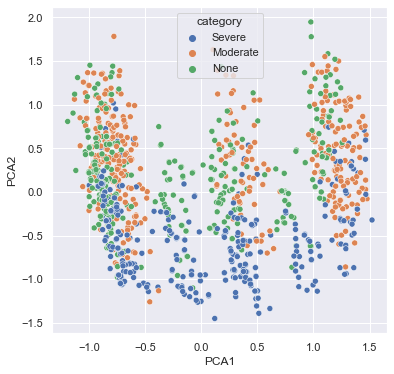

In [46]:
data_pca["category"] = y_smote

sns.set(rc={'figure.figsize':(6,6)})
sns.scatterplot('PCA1', 'PCA2', data=data_pca, hue='category')

plt.show()

In [47]:
trainX = data_pca[["PCA1","PCA2"]]
trainy = data_pca["category"]

testY = test["category"]
testX = test.drop(["depression","category"],axis = 1)

In [48]:
scaler = MinMaxScaler()
X_test = scaler.fit_transform(testX)
pca = PCA(n_components=2)
X_test = pca.fit_transform(X_test)
test_data = pd.DataFrame(X_test, columns = ['PCA1','PCA2'])

In [49]:
testY = testY.reset_index(drop=True)
test_data["category"] = testY

testX = test_data[["PCA1","PCA2"]]
testy = test_data["category"]

In [50]:
from sklearn.svm import SVC
param_grid = [
    {"kernel": ["rbf","poly"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]}
]
modeling(SVC, 'SVM', param_grid, trainX, testX, trainy, testy)

Algorithm: SVM

Tuning hyper-parameters for precision

Best parameters set found:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Classification report:

              precision    recall  f1-score   support

    Moderate       0.61      0.29      0.39        98
        None       0.15      0.24      0.18        21
      Severe       0.17      0.69      0.28        13

    accuracy                           0.32       132
   macro avg       0.31      0.41      0.28       132
weighted avg       0.49      0.32      0.34       132

Train Accuracy:  0.60

Algorithm: SVM

Tuning hyper-parameters for recall

Best parameters set found:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Classification report:

              precision    recall  f1-score   support

    Moderate       0.61      0.29      0.39        98
        None       0.15      0.24      0.18        21
      Severe       0.17      0.69      0.28        13

    accuracy                           0.32       132
   macro avg       0.